# Kapitel 3: Mathematische Grundlagen
## Gradientenberechnung, Matrizenrechnung und Wahrscheinlichkeitsrechnung

## 1. Gradientenberechnung

Der Gradient ist ein Vektor, der die Richtung und Stärke der steilsten Steigung einer Funktion angibt.

Für eine Funktion $f(x_1, x_2, ..., x_n)$ ist der Gradient:

$$\nabla f = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{pmatrix}$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Beispiel 1: Numerische Gradientenberechnung
print("=== Beispiel 1: Numerische Gradientenberechnung ===")

def f(x):
    """Einfache quadratische Funktion: f(x1, x2) = x1^2 + 2*x2^2"""
    return x[0]**2 + 2*x[1]**2

def numerical_gradient(f, x, h=1e-5):
    """Berechnet den Gradienten numerisch (Vorwärtsdifferenz)."""
    gradient = np.zeros_like(x, dtype=float)
    fx = f(x)
    for i in range(len(x)):
        x_h = x.copy()
        x_h[i] += h
        gradient[i] = (f(x_h) - fx) / h
    return gradient

# Punkt, an dem wir den Gradienten berechnen
x = np.array([3.0, 2.0])
grad = numerical_gradient(f, x)

print(f"Punkt: {x}")
print(f"Funktionswert f(x): {f(x):.4f}")
print(f"Gradient ∇f(x): {grad}")
print(f"Magnitude des Gradienten: {np.linalg.norm(grad):.4f}")

=== Beispiel 1: Numerische Gradientenberechnung ===
Punkt: [3. 2.]
Funktionswert f(x): 17.0000
Gradient ∇f(x): [6.00001 8.00002]
Magnitude des Gradienten: 10.0000


In [20]:
# Beispiel 2: Analytische Gradientenberechnung mit SymPy
print("\n=== Beispiel 2: Analytische Gradientenberechnung ===")

x1, x2 = sp.symbols('x1 x2')
f_sym = x1**2 + 2*x2**2

# Partielle Ableitungen berechnen
df_dx1 = sp.diff(f_sym, x1)
df_dx2 = sp.diff(f_sym, x2)

print(f"f(x1, x2) = {f_sym}")
print(f"∂f/∂x1 = {df_dx1}")
print(f"∂f/∂x2 = {df_dx2}")

# Gradient an bestimmtem Punkt auswerten
grad_x1 = df_dx1.subs({x1: 3, x2: 2})
grad_x2 = df_dx2.subs({x1: 3, x2: 2})

print(f"\n∇f(3, 2) = [{grad_x1}, {grad_x2}]")


=== Beispiel 2: Analytische Gradientenberechnung ===
f(x1, x2) = x1**2 + 2*x2**2
∂f/∂x1 = 2*x1
∂f/∂x2 = 4*x2

∇f(3, 2) = [6, 8]



=== Beispiel 3: Visualisierung des Gradienten ===


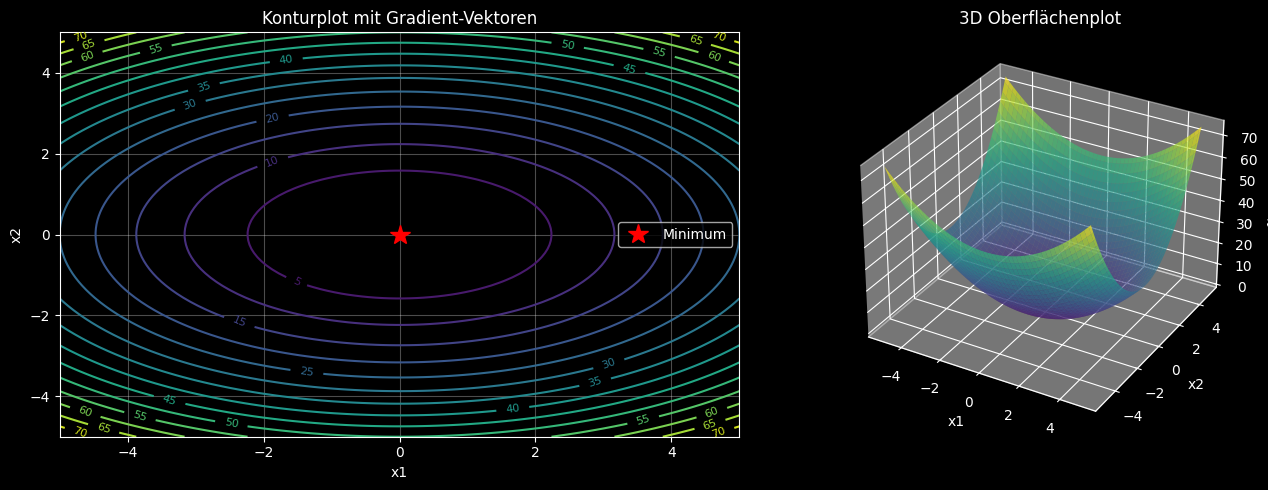

Gradient zeigt in Richtung des steilsten Anstiegs


In [21]:
# Beispiel 3: Visualisierung des Gradienten
print("\n=== Beispiel 3: Visualisierung des Gradienten ===")

# Erzeuge ein Gitter
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = X1**2 + 2*X2**2

# Gradient an jedem Punkt
dZ_dx1 = 2*X1
dZ_dx2 = 4*X2

fig = plt.figure(figsize=(14, 5))

# Konturplot mit Gradient
ax1 = fig.add_subplot(1, 2, 1)
contour = ax1.contour(X1, X2, Z, levels=15, cmap='viridis')
ax1.clabel(contour, inline=True, fontsize=8)
ax1.quiver(
    X1[::5, ::5], X2[::5, ::5],
    dZ_dx1[::5, ::5], dZ_dx2[::5, ::5],
    alpha=0.6
)
ax1.plot(0, 0, 'r*', markersize=15, label='Minimum')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Konturplot mit Gradient-Vektoren')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 3D Oberflächenplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('f(x1, x2)')
ax2.set_title('3D Oberflächenplot')

plt.tight_layout()
plt.show()

print("Gradient zeigt in Richtung des steilsten Anstiegs")


=== Beispiel 4: Gradient Descent Optimierung ===
Startpunkt: [4. 3.]
Optimaler Punkt: [ 1.01245728e-04 -4.99938889e-06]
Funktionswert am Optimum: 0.000000


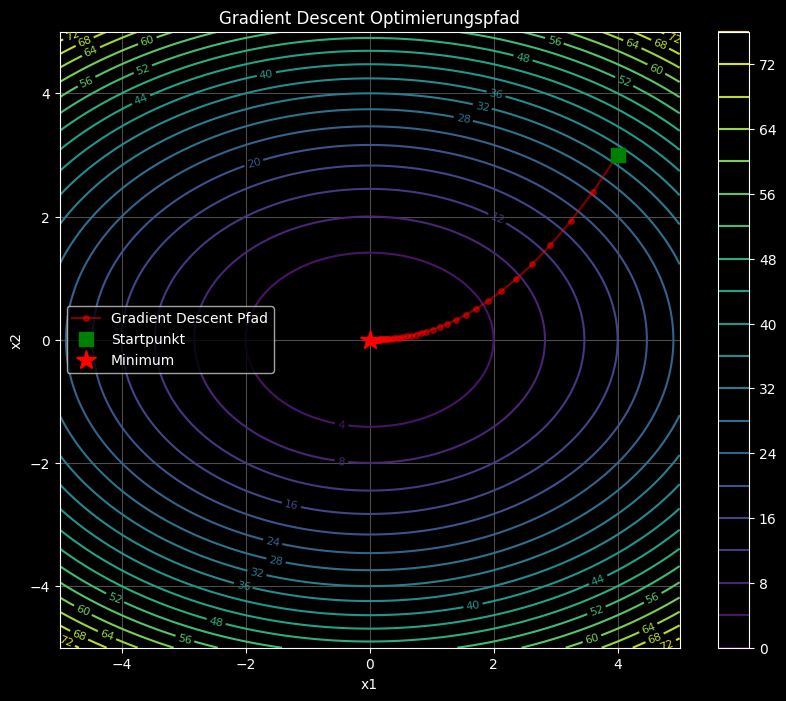

In [22]:
# Beispiel 4: Gradient Descent (Gradientenabstieg)
print("\n=== Beispiel 4: Gradient Descent Optimierung ===")

def gradient_descent(starting_point, learning_rate=0.01, iterations=100):
    """Führt Gradientenabstieg durch."""
    x = starting_point.copy()
    history = [x.copy()]

    for _ in range(iterations):
        grad = numerical_gradient(f, x)
        x = x - learning_rate * grad
        history.append(x.copy())

    return x, np.array(history)

# Gradient Descent starten
start = np.array([4.0, 3.0])
optimal, history = gradient_descent(start, learning_rate=0.05, iterations=100)

print(f"Startpunkt: {start}")
print(f"Optimaler Punkt: {optimal}")
print(f"Funktionswert am Optimum: {f(optimal):.6f}")

# Visualisierung des Optimierungspfads
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.plot(history[:, 0], history[:, 1], 'ro-', alpha=0.5, markersize=4, label='Gradient Descent Pfad')
plt.plot(history[0, 0], history[0, 1], 'gs', markersize=10, label='Startpunkt')
plt.plot(history[-1, 0], history[-1, 1], 'r*', markersize=15, label='Minimum')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Optimierungspfad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(contour)
plt.show()

## 2. Matrizenrechnung

Matrizen sind rechteckige Anordnungen von Zahlen. Grundlegende Operationen sind:
- **Addition und Subtraktion**: elementweise
- **Multiplikation**: Skalar-Multiplikation oder Matrix-Multiplikation
- **Transponieren**: Zeilen und Spalten vertauschen
- **Determinante und Inverse**: für quadratische Matrizen

In [23]:
print("=== Beispiel 1: Grundlegende Matrizenoperationen ===")

# Matrizen definieren
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

B = np.array([
    [7, 8, 9],
    [10, 11, 12]
])

print(f"Matrix A:\n{A}")
print(f"\nMatrix B:\n{B}")

# Addition
print(f"\nA + B:\n{A + B}")

# Subtraktion
print(f"\nA - B:\n{A - B}")

# Skalar-Multiplikation
print(f"\n2 * A:\n{2 * A}")

# Transponieren
print(f"\nA^T (Transponierte von A):\n{A.T}")

=== Beispiel 1: Grundlegende Matrizenoperationen ===
Matrix A:
[[1 2 3]
 [4 5 6]]

Matrix B:
[[ 7  8  9]
 [10 11 12]]

A + B:
[[ 8 10 12]
 [14 16 18]]

A - B:
[[-6 -6 -6]
 [-6 -6 -6]]

2 * A:
[[ 2  4  6]
 [ 8 10 12]]

A^T (Transponierte von A):
[[1 4]
 [2 5]
 [3 6]]


In [24]:
print("\n=== Beispiel 2: Matrix-Multiplikation ===")

# Matrix-Multiplikation A x B ist nur möglich, wenn Spalten(A) = Zeilen(B)
C = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

D = np.array([
    [7, 8, 9],
    [10, 11, 12]
])

print(f"Matrix C (3x2):\n{C}")
print(f"\nMatrix D (2x3):\n{D}")

result = C @ D
print(f"\nC x D (3x3):\n{result}")
print(f"Shape: {result.shape}")

# Element-weise Multiplikation (Hadamard-Produkt)
E = np.array([
    [1, 2],
    [3, 4]
])

F = np.array([
    [5, 6],
    [7, 8]
])

print("\nElement-weise Multiplikation (Hadamard-Produkt):")
print(f"E * F =\n{E * F}")


=== Beispiel 2: Matrix-Multiplikation ===
Matrix C (3x2):
[[1 2]
 [3 4]
 [5 6]]

Matrix D (2x3):
[[ 7  8  9]
 [10 11 12]]

C x D (3x3):
[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]
Shape: (3, 3)

Element-weise Multiplikation (Hadamard-Produkt):
E * F =
[[ 5 12]
 [21 32]]


In [25]:
print("\n=== Beispiel 3: Determinante und Inverse ===")

G = np.array([
    [1, 2],
    [3, 4]
])

print(f"Matrix G:\n{G}")

det = np.linalg.det(G)
print(f"\nDeterminante von G: {det:.4f}")

if det != 0:
    G_inv = np.linalg.inv(G)
    print(f"\nInverse von G:\n{G_inv}")

    identity = G * G_inv
    print(f"\nVerifizierung: G x G^-1 =\n{identity}")


=== Beispiel 3: Determinante und Inverse ===
Matrix G:
[[1 2]
 [3 4]]

Determinante von G: -2.0000

Inverse von G:
[[-2.   1. ]
 [ 1.5 -0.5]]

Verifizierung: G x G^-1 =
[[-2.   2. ]
 [ 4.5 -2. ]]


In [26]:
print("\n=== Beispiel 4: Eigenwerte und Eigenvektoren ===")

H = np.array([
    [4, -2],
    [-2, 4]
])

print(f"Matrix H:\n{H}")

eigenvalues, eigenvectors = np.linalg.eig(H)

print(f"\nEigenwerte: {eigenvalues}")
print(f"\nEigenvektoren:\n{eigenvectors}")

for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lambda_i = eigenvalues[i]
    result1 = H * v
    result2 = lambda_i * v
    print(f"\nEigenwert {i+1}: λ = {lambda_i:.4f}")
    print(f"H x v = {result1}")
    print(f"λ * v = {result2}")


=== Beispiel 4: Eigenwerte und Eigenvektoren ===
Matrix H:
[[ 4 -2]
 [-2  4]]

Eigenwerte: [6. 2.]

Eigenvektoren:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigenwert 1: λ = 6.0000
H x v = [[ 2.82842712  1.41421356]
 [-1.41421356 -2.82842712]]
λ * v = [ 4.24264069 -4.24264069]

Eigenwert 2: λ = 2.0000
H x v = [[ 2.82842712 -1.41421356]
 [-1.41421356  2.82842712]]
λ * v = [1.41421356 1.41421356]


In [27]:
print("\n=== Beispiel 5: Lineare Gleichungssysteme ===")

# Löse: A x x = b
A = np.array([
    [2, 1],
    [1, 3]
])

b = np.array([5, 6])

print(f"Matrix A:\n{A}")
print(f"Vektor b: {b}")
print("\nLöse: A x x = b")

x = np.linalg.solve(A, b)
print(f"Lösung x: {x}")

check = A * x
print(f"\nVerifizierung: A x x = {check}")
print(f"Sollte gleich b = {b} sein")


=== Beispiel 5: Lineare Gleichungssysteme ===
Matrix A:
[[2 1]
 [1 3]]
Vektor b: [5 6]

Löse: A x x = b
Lösung x: [1.8 1.4]

Verifizierung: A x x = [[3.6 1.4]
 [1.8 4.2]]
Sollte gleich b = [5 6] sein


## 3. Wahrscheinlichkeitsrechnung

Wahrscheinlichkeitsrechnung befasst sich mit Zufallsereignissen und deren Wahrscheinlichkeiten.

**Grundlegende Konzepte:**
- **Wahrscheinlichkeit**: $P(A) \in [0, 1]$
- **Bedingte Wahrscheinlichkeit**: $P(A\mid B) = \frac{P(A\cap B)}{P(B)}$
- **Bayes-Regel**: $P(A\mid B) = \frac{P(B\mid A)\,P(A)}{P(B)}$
- **Verteilungen**: Normal-, Binomial-, Poisson-Verteilung
- **Erwartungswert und Varianz**: charakterisieren eine Verteilung

In [28]:
from scipy import stats
import random

print("=== Beispiel 1: Grundlegende Wahrscheinlichkeiten ===")

print("Würfel (6 mögliche Ergebnisse):")
print(f"P(1) = {1/6:.4f}")
print(f"P(gerade Zahl) = P(2,4,6) = {3/6:.4f}")

print("\nMünze werfen:")
print(f"P(Kopf) = {1/2:.4f}")
print(f"P(Zahl) = {1/2:.4f}")

print("\nZwei unabhängige Münzwürfe:")
print(f"P(Kopf AND Kopf) = {1/2 * 1/2:.4f}")
print(f"P(mindestens ein Kopf) = {1 - (1/2 * 1/2):.4f}")

=== Beispiel 1: Grundlegende Wahrscheinlichkeiten ===
Würfel (6 mögliche Ergebnisse):
P(1) = 0.1667
P(gerade Zahl) = P(2,4,6) = 0.5000

Münze werfen:
P(Kopf) = 0.5000
P(Zahl) = 0.5000

Zwei unabhängige Münzwürfe:
P(Kopf AND Kopf) = 0.2500
P(mindestens ein Kopf) = 0.7500


In [29]:
print("\n=== Beispiel 2: Bedingte Wahrscheinlichkeit und Bayes' Theorem ===")

# Beispiel: Krankheit und Test
# P(Krankheit) = 0.01
# P(Test positiv | Krankheit) = 0.99 (Sensitivität)
# P(Test positiv | keine Krankheit) = 0.05 (falsch positiv)

P_disease = 0.01
P_positive_given_disease = 0.99
P_positive_given_no_disease = 0.05

P_no_disease = 1 - P_disease

P_positive = (
    P_positive_given_disease * P_disease
    + P_positive_given_no_disease * P_no_disease
)

P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

print(f"P(Krankheit) = {P_disease:.4f}")
print(f"P(Test positiv | Krankheit) = {P_positive_given_disease:.4f}")
print(f"P(Test positiv | keine Krankheit) = {P_positive_given_no_disease:.4f}")
print(f"\nP(Test positiv) = {P_positive:.4f}")
print("\nBayes' Theorem:")
print(f"P(Krankheit | Test positiv) = {P_disease_given_positive:.4f}")
print(f"\n→ Trotz positiven Test: Nur {P_disease_given_positive*100:.1f}% Wahrscheinlichkeit für Krankheit")


=== Beispiel 2: Bedingte Wahrscheinlichkeit und Bayes' Theorem ===
P(Krankheit) = 0.0100
P(Test positiv | Krankheit) = 0.9900
P(Test positiv | keine Krankheit) = 0.0500

P(Test positiv) = 0.0594

Bayes' Theorem:
P(Krankheit | Test positiv) = 0.1667

→ Trotz positiven Test: Nur 16.7% Wahrscheinlichkeit für Krankheit


In [30]:
print("\n=== Beispiel 3: Diskrete Verteilungen ===")

n = 10
p = 0.5

print("Binomialverteilung (10 Münzwürfe):")
for k in range(0, n + 1, 2):
    prob = stats.binom.pmf(k, n, p)
    print(f"P(X = {k}) = {prob:.4f}")

mean_binom = n * p
var_binom = n * p * (1 - p)
std_binom = np.sqrt(var_binom)

print(f"\nErwartungswert E[X] = n*p = {mean_binom:.2f}")
print(f"Varianz Var[X] = n*p*(1-p) = {var_binom:.2f}")
print(f"Standardabweichung σ = {std_binom:.2f}")

print("\n" + "=" * 50)
print("Poisson-Verteilung (λ = 3):")
lambda_param = 3
for k in range(0, 8):
    prob = stats.poisson.pmf(k, lambda_param)
    print(f"P(X = {k}) = {prob:.4f}")

mean_poisson = lambda_param
var_poisson = lambda_param
print(f"\nErwartungswert E[X] = λ = {mean_poisson}")
print(f"Varianz Var[X] = λ = {var_poisson}")


=== Beispiel 3: Diskrete Verteilungen ===
Binomialverteilung (10 Münzwürfe):
P(X = 0) = 0.0010
P(X = 2) = 0.0439
P(X = 4) = 0.2051
P(X = 6) = 0.2051
P(X = 8) = 0.0439
P(X = 10) = 0.0010

Erwartungswert E[X] = n*p = 5.00
Varianz Var[X] = n*p*(1-p) = 2.50
Standardabweichung σ = 1.58

Poisson-Verteilung (λ = 3):
P(X = 0) = 0.0498
P(X = 1) = 0.1494
P(X = 2) = 0.2240
P(X = 3) = 0.2240
P(X = 4) = 0.1680
P(X = 5) = 0.1008
P(X = 6) = 0.0504
P(X = 7) = 0.0216

Erwartungswert E[X] = λ = 3
Varianz Var[X] = λ = 3



=== Beispiel 4: Normalverteilung (Gaußverteilung) ===
Normalverteilung mit μ = 100, σ = 15

P(X ≤ 110) = 0.7475
P(85 ≤ X ≤ 115) = 0.6827

Z-Score für X = 110: z = 0.6667
P(Z ≤ 0.6667) = 0.7475


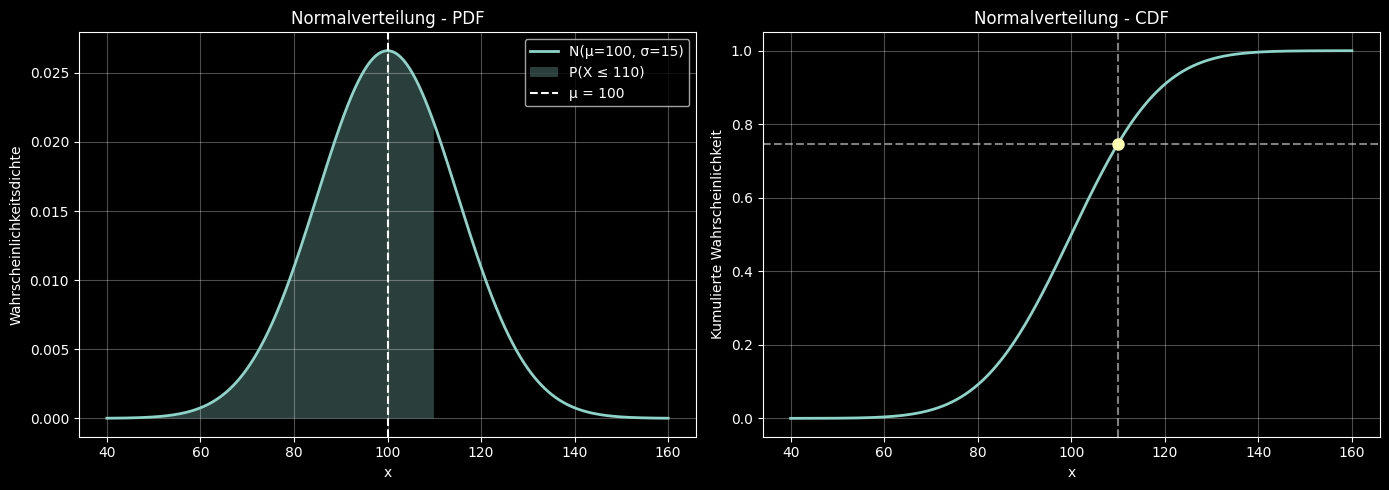

In [31]:
print("\n=== Beispiel 4: Normalverteilung (Gaußverteilung) ===")

mu = 100
sigma = 15

x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

P_less_110 = stats.norm.cdf(110, mu, sigma)
P_between = stats.norm.cdf(115, mu, sigma) - stats.norm.cdf(85, mu, sigma)

print(f"Normalverteilung mit μ = {mu}, σ = {sigma}")
print(f"\nP(X ≤ 110) = {P_less_110:.4f}")
print(f"P(85 ≤ X ≤ 115) = {P_between:.4f}")

z_score = (110 - mu) / sigma
print(f"\nZ-Score für X = 110: z = {z_score:.4f}")
print(f"P(Z ≤ {z_score:.4f}) = {stats.norm.cdf(z_score):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.plot(x, y, linewidth=2, label='N(μ=100, σ=15)')
x_fill = x[x <= 110]
y_fill = stats.norm.pdf(x_fill, mu, sigma)
ax.fill_between(x_fill, y_fill, alpha=0.3, label='P(X ≤ 110)')
ax.axvline(mu, linestyle='--', label=f'μ = {mu}')
ax.set_xlabel('x')
ax.set_ylabel('Wahrscheinlichkeitsdichte')
ax.set_title('Normalverteilung - PDF')
ax.legend()
ax.grid(True, alpha=0.3)

y_cdf = stats.norm.cdf(x, mu, sigma)
ax = axes[1]
ax.plot(x, y_cdf, linewidth=2)
ax.axhline(P_less_110, linestyle='--', alpha=0.5)
ax.axvline(110, linestyle='--', alpha=0.5)
ax.plot(110, P_less_110, marker='o', markersize=8)
ax.set_xlabel('x')
ax.set_ylabel('Kumulierte Wahrscheinlichkeit')
ax.set_title('Normalverteilung - CDF')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== Beispiel 5: Stichprobenziehen und Verteilungsvergleich ===
Exponentialverteilung (Skala=2) Stichproben ziehen:
Stichprobengröße: 30
Anzahl Stichproben: 100000

Mittelwert der Stichprobenmittel: 1.9999
Standardabweichung der Stichprobenmittel: 0.3656


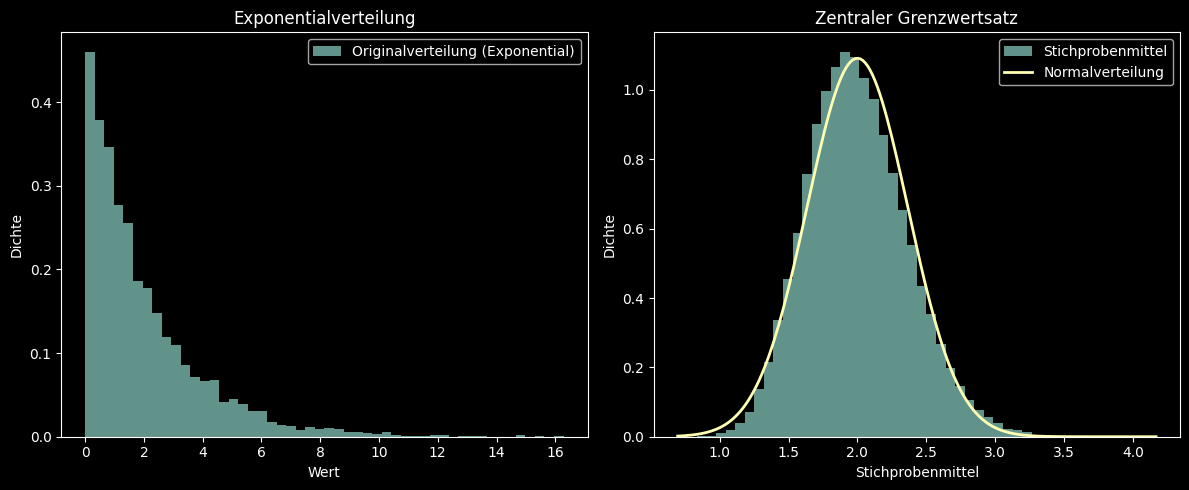


→ Trotz Exponentialverteilung der Originalwerte sind die Stichprobenmittel näherungsweise normalverteilt!


In [32]:
print("\n=== Beispiel 5: Stichprobenziehen und Verteilungsvergleich ===")

np.random.seed(42)

n_samples = 100000
sample_size = 30

sample_means = []
for _ in range(n_samples):
    samples = np.random.exponential(scale=2, size=sample_size)
    sample_means.append(np.mean(samples))

sample_means = np.array(sample_means)

print("Exponentialverteilung (Skala=2) Stichproben ziehen:")
print(f"Stichprobengröße: {sample_size}")
print(f"Anzahl Stichproben: {n_samples}")
print(f"\nMittelwert der Stichprobenmittel: {np.mean(sample_means):.4f}")
print(f"Standardabweichung der Stichprobenmittel: {np.std(sample_means):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

original = np.random.exponential(scale=2, size=5000)
axes[0].hist(original, bins=50, density=True, alpha=0.7, label='Originalverteilung (Exponential)')
axes[0].set_xlabel('Wert')
axes[0].set_ylabel('Dichte')
axes[0].set_title('Exponentialverteilung')
axes[0].legend()

axes[1].hist(sample_means, bins=50, density=True, alpha=0.7, label='Stichprobenmittel')
x_normal = np.linspace(sample_means.min(), sample_means.max(), 200)
y_normal = stats.norm.pdf(x_normal, np.mean(sample_means), np.std(sample_means))
axes[1].plot(x_normal, y_normal, linewidth=2, label='Normalverteilung')
axes[1].set_xlabel('Stichprobenmittel')
axes[1].set_ylabel('Dichte')
axes[1].set_title('Zentraler Grenzwertsatz')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n→ Trotz Exponentialverteilung der Originalwerte sind die Stichprobenmittel näherungsweise normalverteilt!")


=== Beispiel 6: Kovarianz und Korrelation ===
Statistiken von X: μ = 0.0193, σ = 0.9787
Statistiken von Y: μ = 0.0741, σ = 2.0003

Kovarianz Cov(X,Y) = 1.8980
Korrelation Corr(X,Y) = 0.9685


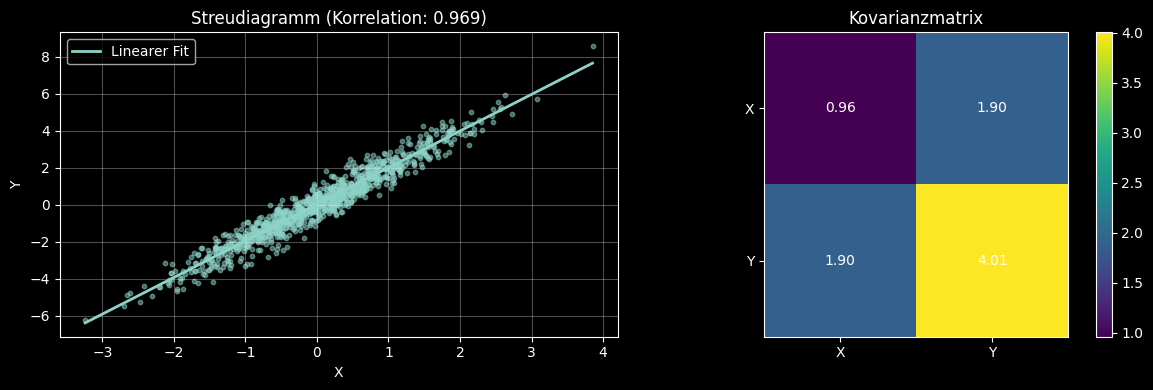

In [33]:
print("\n=== Beispiel 6: Kovarianz und Korrelation ===")

np.random.seed(42)
n = 1000

X = np.random.normal(0, 1, n)
noise = np.random.normal(0, 0.5, n)
Y = 2 * X + noise

mean_X = np.mean(X)
mean_Y = np.mean(Y)
std_X = np.std(X)
std_Y = np.std(Y)

cov = np.cov(X, Y)[0, 1]
corr = np.corrcoef(X, Y)[0, 1]

print(f"Statistiken von X: μ = {mean_X:.4f}, σ = {std_X:.4f}")
print(f"Statistiken von Y: μ = {mean_Y:.4f}, σ = {std_Y:.4f}")
print(f"\nKovarianz Cov(X,Y) = {cov:.4f}")
print(f"Korrelation Corr(X,Y) = {corr:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(X, Y, alpha=0.5, s=10)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
x_line = np.linspace(X.min(), X.max(), 100)
axes[0].plot(x_line, p(x_line), linewidth=2, label='Linearer Fit')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title(f'Streudiagramm (Korrelation: {corr:.3f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

cov_matrix = np.cov(X, Y)
im = axes[1].imshow(cov_matrix)
plt.colorbar(im, ax=axes[1])
axes[1].set_title('Kovarianzmatrix')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['X', 'Y'])
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['X', 'Y'])
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, f'{cov_matrix[i, j]:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()


=== Beispiel 7: Maximum Likelihood Estimation (MLE) ===
Wahre Parameter: μ = 5, σ = 2

Stichprobe hat 100 Datenpunkte

MLE Schätzungen:
μ̂ = 4.7923 (wahr: 5)
σ̂ = 1.8072 (wahr: 2)


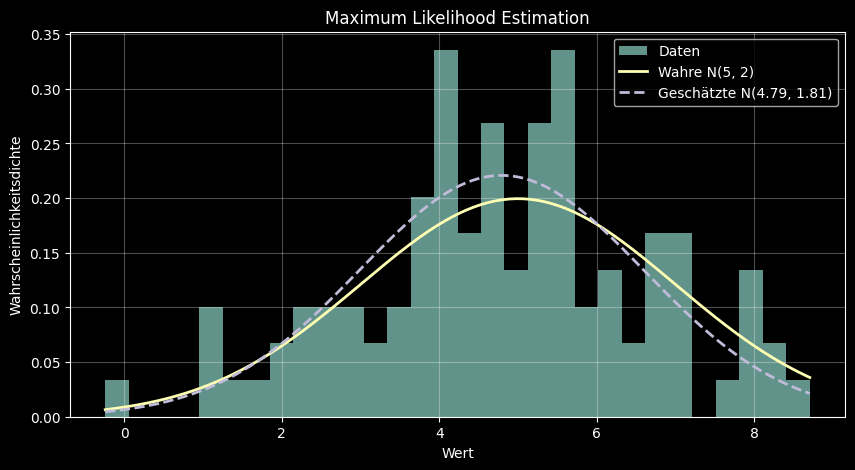

In [34]:
print("\n=== Beispiel 7: Maximum Likelihood Estimation (MLE) ===")

np.random.seed(42)
true_mu = 5
true_sigma = 2
data = np.random.normal(true_mu, true_sigma, 100)

print(f"Wahre Parameter: μ = {true_mu}, σ = {true_sigma}")
print(f"\nStichprobe hat {len(data)} Datenpunkte")

# MLE-Schätzer (für Normalverteilung, hier mit Populations-Std: ddof=0)
estimated_mu = np.mean(data)
estimated_sigma = np.std(data)

print("\nMLE Schätzungen:")
print(f"μ̂ = {estimated_mu:.4f} (wahr: {true_mu})")
print(f"σ̂ = {estimated_sigma:.4f} (wahr: {true_sigma})")

plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, density=True, alpha=0.7, label='Daten')

x = np.linspace(data.min(), data.max(), 200)
y_true = stats.norm.pdf(x, true_mu, true_sigma)
plt.plot(x, y_true, linewidth=2, label=f'Wahre N({true_mu}, {true_sigma})')

y_est = stats.norm.pdf(x, estimated_mu, estimated_sigma)
plt.plot(x, y_est, linestyle='--', linewidth=2, label=f'Geschätzte N({estimated_mu:.2f}, {estimated_sigma:.2f})')

plt.xlabel('Wert')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Maximum Likelihood Estimation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Zusammenfassung

In diesem Kapitel haben wir die drei fundamentalen mathematischen Konzepte behandelt:

### 1. **Gradientenberechnung**
- Gradient zeigt Richtung des steilsten Anstiegs
- Essentiell für Optimierungsverfahren (Gradient Descent)
- Numerische vs. analytische Berechnung

### 2. **Matrizenrechnung**
- Grundlegende Operationen (Addition, Multiplikation, Transponieren)
- Determinante und Inverse
- Eigenwerte und Eigenvektoren
- Lösen linearer Gleichungssysteme

### 3. **Wahrscheinlichkeitsrechnung**
- Grundlegende Wahrscheinlichkeitskonzepte
- Bedingte Wahrscheinlichkeit und Bayes' Theorem
- Diskrete Verteilungen (Binomial, Poisson)
- Normalverteilung und Zentraler Grenzwertsatz
- Kovarianz, Korrelation und Maximum Likelihood Estimation

Diese Konzepte bilden die mathematische Grundlage für Machine Learning und künstliche Intelligenz!